K-medoid, also called Partitioning Around Medoid (PAM), is a clustering algorithm that uses medoids as the center of the clusters. The medoid is selected as the point whose whose dissimilarities with all the other points in the cluster is minimum.

k-medoids is the basis of Clara so we start with an example of k-medoid. Here we will use sklearn_extra, another package has been developed that offers k-medoids algorithm aside from pyclustering. This is faster than pyclustering that we used in the previous notebook. 

References:

1. https://www.geeksforgeeks.org/ml-k-medoids-clustering-with-example/
2. https://www.kaggle.com/saptarsi/kmedoid-sg/notebook

Before we apply k-medoids on a test data, we will understand the theory behind it first. The first steps of clustering is the same as the generalized method:

1. Initialize: select k random points out of the n data points as the medoids $m$. 
2. Associate each data point $o$ to the closest medoid by using any common distance metric methods. One possible distance or dissimilarity measure is $𝐷=|𝑝_𝑖−𝐶_𝑖 |$.
3. Compute the cost $J$. 
<img src = 'figures/cost_medoid.PNG'> 

While the cost decreases:
   1. Swap $m$ and $o$, associate each data point to the closest medoid, recompute the cost.
   2. If the total cost is more than that in the previous step, undo the swap.

Given a toy dataset as follows, we want to apply k-medoids. 
Step 1. We set k=2 and select them randomly (in red) C1 -(4, 5) and C2 -(8, 5) as the two medoids.
<img src = 'figures/1.PNG'>

Plotting the points, we see the following.
<img src = 'figures/2.PNG'>

Step 2. Now we measure the dissimilarity of each data point with respect to each medoid. Just like in the general clustering method, we will assign the data points to clusters/medoid where the dissimilarity is minimum.
<img src = 'figures/3-dissimiarity.PNG'>

In this case, points 1, 2, 5 go to cluster C1 and 0, 3, 6, 7, 8 go to cluster C2.
The Cost is given as (3 + 4 + 4) + (3 + 1 + 1 + 2 + 2) = 20

Step 3. We randomly select a non-medoid point to be a possible candidate new medoid and recalculate the cost. Using point (8, 4) as the possible medoid to swap with the current medoids C2, the dissimilarity of each non-medoid point with the medoids – C1 (4, 5) and C2 (8, 4) is as follows.
<img src = 'figures/4- recalc dissimiarity.PNG'>

Again, each point is assigned to that cluster whose dissimilarity is less. So, the points 1, 2, 5 go to cluster C1 and 0, 3, 6, 7, 8 go to cluster C2. Calculating the new cost, we have Cost=(3 + 4 + 4) + (2 + 2 + 1 + 3 + 3) = 22, which is higher than the first cluster. Thus the medoids will not be swapped with the randomly choses medoid.

The process will be repeated until the cost is minimized. For this case, we have the final cluster as in the following figure.

<img src = 'figures/final cluster.PNG'>

### Implementing k-medoids

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [3]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [14]:
x.shape

(150, 4)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [36]:
y_kmed

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [22]:
print(y_kmed, len(y_kmed))
kMedoids.inertia_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1] 150


131.87877332824286

In [16]:
cols = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

In [23]:
data = pd.DataFrame(x,y, columns=cols)
data.insert(0, 'Cluster_num', y_kmed)
data

,Cluster_num,Sepal length,Sepal width,Petal length,Petal width
0,0,5.1,3.5,1.4,0.2
0,0,4.9,3.0,1.4,0.2
0,0,4.7,3.2,1.3,0.2
0,0,4.6,3.1,1.5,0.2
0,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
2,2,6.7,3.0,5.2,2.3
2,1,6.3,2.5,5.0,1.9
2,2,6.5,3.0,5.2,2.0
2,2,6.2,3.4,5.4,2.3


#### Evaluating quality of clusters using silhouette measure

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.4590416105554613


In [7]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.636330614585637
0.3768888598233938
0.36213487963471125


In [8]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)
    

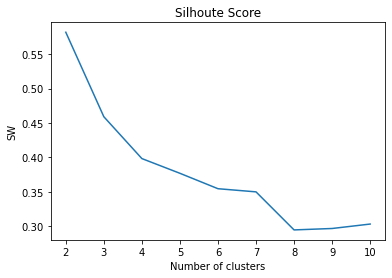

In [9]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

#### Evaluating quality of clusters using purity

In [10]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.8333333333333334

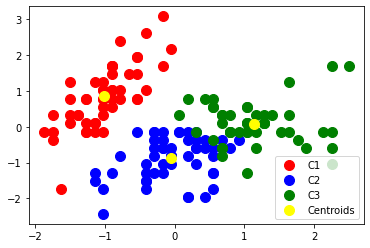

In [26]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [27]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

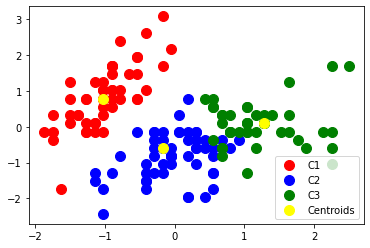

In [28]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Add extreme values to check sensitivity to outliers

In [29]:
import numpy as np
m=np.append(x,[[10,10,10,10],[15,15,15,15],[12,12,12,12]],axis=0)
m.shape
y=np.append(y,[2,2,2])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
scaler = StandardScaler().fit(m)
x_scaled = scaler.transform(m)

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.673202614379085

In [32]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.8627450980392157

<AxesSubplot:title={'center':'Cluster Quality'}, xlabel='Method'>

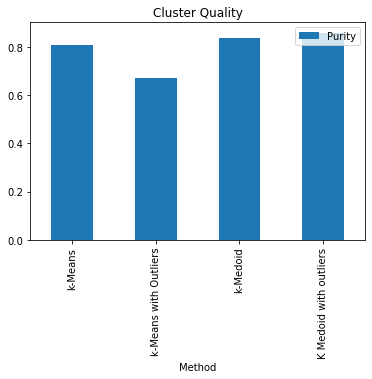

In [34]:
data = [['k-Means', 0.81], ['k-Means with Outliers', 0.67], ['k-Medoid', 0.84],['K Medoid with outliers', 0.86]] 
df = pd.DataFrame(data, columns = ['Method', 'Purity']) 
df.plot.bar(x='Method',y='Purity',title='Cluster Quality')